# Linear Regression using one variable

In [1]:
import helpers as hlp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Configuration

In [2]:
# Configuration Parameters
learning_rate = 0.00001
epochs = 10000
display_step = 100
display_step_num = int(np.floor(
    epochs / display_step)) + 1  # +1 to include the very first step

## Import Data

In [6]:
# Import data
train_data = np.loadtxt(
    "../../../data/ex1/ex1data1.txt", dtype="float64", delimiter=",")
train_x_unbiased = np.delete(train_data, -1, axis=1)
train_x = np.insert(train_x_unbiased, 0, 1, axis=1)
train_y = np.delete(train_data, np.s_[:-1], axis=1)

## Visualize Data

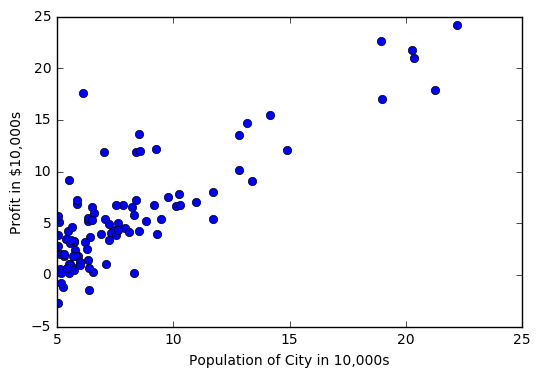

In [4]:
# Visualize Data
labels = {
    "figure_labels": ["Food Truck Profit Prediction"],
    "x_labels": ["Population of City in 10,000s"],
    "y_label": "Profit in $10,000s",
}

hlp.plot_unclassified_data(train_x_unbiased, train_y, **labels)

## Define Model

In [5]:
# Parameters
x = tf.placeholder(tf.float64, name="x")
y = tf.placeholder(tf.float64, name="y")
m = train_y.shape[1]  # number of training examples

# Model
theta = tf.Variable(
    tf.zeros(
        (train_x.shape[1], 1), dtype=tf.float64), name="theta")
prediction = tf.matmul(x, theta)

# Cost Function
cost = tf.reduce_sum(1 / 2 * m * tf.pow(tf.subtract(prediction, y), 2))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Initialization

In [6]:
# Initialize Session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

file_writer = tf.summary.FileWriter("logs/single/run1", sess.graph)

## Run Model

In [7]:
costs = np.zeros(display_step_num)
cost_indices = np.zeros(display_step_num)

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={x: train_x, y: train_y})

    if epoch % display_step == 0:
        display_step_cur_num = int(epoch / display_step)
        costs[display_step_cur_num] = cost.eval(
            feed_dict={x: train_x,
                       y: train_y})
        cost_indices[display_step_cur_num] = epoch

costs[display_step_num - 1] = cost.eval(feed_dict={x: train_x, y: train_y})
cost_indices[display_step_num - 1] = epochs - 1

## Plot Cost Function

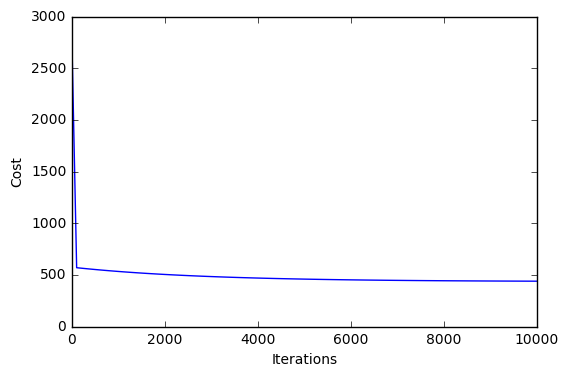

In [8]:
plt.figure("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.plot(cost_indices, costs)
plt.show()

## Plot Fitted Line

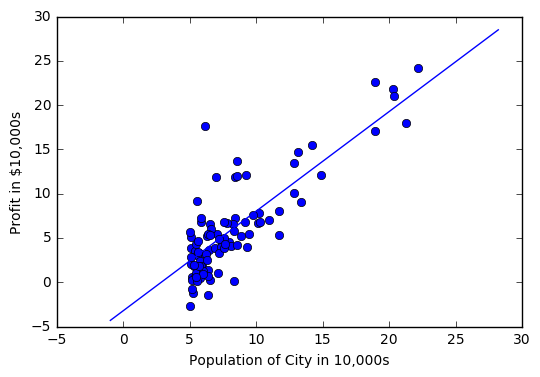

In [9]:
hlp.plot_unclassified_data(train_x_unbiased, train_y, show=False, **labels)
hlp.plot_fitted_line(train_x_unbiased, theta.eval(), padding=0.35)

## Results

In [10]:
print("Theta: \n" + str(theta.eval()) + "\n")
print("Final Cost: \n" + str(cost.eval(feed_dict={x: train_x, y: train_y})))

Theta: 
[[-3.20402165]
 [ 1.12353893]]

Final Cost: 
438.492044623


## Close Session

In [11]:
sess.close()